In [27]:
import random as rd
import numpy as np
import scipy as sp

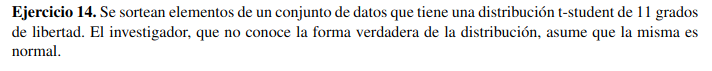
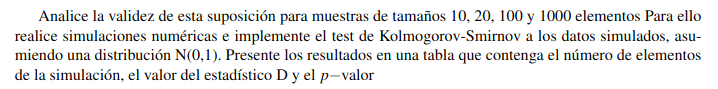

$$
H_0: \text{La muestra de datos provienen de una distribución normal ~ N(0,1)} \\
$$

Primero debo poder calcular el estadistico D usando la funcion de distribución acomulada de la distribucion normal estandar.

In [28]:
def estadistico_K_S_normal(data):
    data.sort()
    n = len(data)
    D = []
    for i in range(n):
        F_yj = sp.stats.norm.cdf(data[i])
        izq = ((i+1)/n) - F_yj
        der = F_yj - (i/n)
        D.append(max(izq, der))
    return max(D)

def estadistico_K_S_uniform(data):
    data=np.sort(data) #Ordeno
    n=len(data)
    d=0
    for j in range(n):
        x=data[j]
        d=max(d ,((j+1)/n)-x , x - j/n)
    return d

En las simulaciones para el p-valor, la primera muestra sera obtenida a partir de una tstudent, ya que son los valores originales. Y el estadistico se obtiene usando la funcion de distribucion acomulada F de una distribucion normal estandar, ya que es la distribucion de la hipotesis nula. Los pasos siguientes se haran usando una muestra de valores aleatorios de una uniforme en (0,1)

In [29]:
def simular_pvalor(nsims,muestra):
    n = len(muestra)
    t = estadistico_K_S_normal(muestra)
    hits = 0
    for i in range(nsims):
        muestra_sim = [rd.uniform(0,1) for _ in range(n)]
        t_sim = estadistico_K_S_uniform(muestra_sim)
        if t_sim > t:
            hits += 1
    return hits/nsims

In [30]:
def gen_muestra(n):
    return sp.stats.t.rvs(df=11, size=n)

In [34]:
nsims = 10000
n_s = [10,20,100,1000]
for n in n_s:
    muestra = gen_muestra(n)
    D = estadistico_K_S_normal(muestra)
    pvalor = simular_pvalor(nsims,muestra)
    res_sp = sp.stats.kstest(muestra, 'norm', args=(0,1))
    print(f"======= n={n} =======")
    print(f"D: {D}, pvalor={pvalor}")
    print(f"scipy D: {res_sp[0]}, pvalor: {res_sp[1]}")

======= n=10 =======
D: 0.2239762245817113, pvalor=0.6167
scipy D: 0.2239762245817113, pvalor: 0.6210558513686727
======= n=20 =======
D: 0.20502899214440473, pvalor=0.3247
scipy D: 0.20502899214440473, pvalor: 0.32416859027339495
======= n=100 =======
D: 0.10750139772739542, pvalor=0.1808
scipy D: 0.10750139772739542, pvalor: 0.18423515476367902
======= n=1000 =======
D: 0.024291987420639205, pvalor=0.5792
scipy D: 0.024291987420639205, pvalor: 0.5879903110143754
